# Clasificación de imágenes usando redes convolucionales
Vamos a usar el dataset CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)
Este dataset contiene 60000 imágenes de tamaño 32x32 dividido en 10 clases diferentes (6000 imagenes por clase). El dataset se divide en 50000 imágenes para entrenamiento y 10000 para test. 
Las clases son:
* airplane 										
* automobile 										
* bird 										
* cat 										
* deer 										
* dog 										
* frog 										
* horse 										
* ship 										
* truck

Obtendremos el dataset importándolo desde Keras, que ya lo incorpora.

In [1]:
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/config/experimental/set_memory_growth#for_example
# necesario para que la GPU no se quede sin memoria.

import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


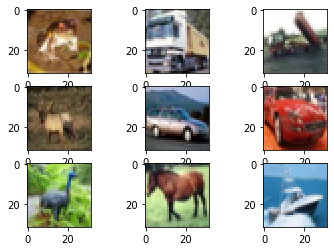

In [4]:
# algunas imágenes del dataset
import matplotlib.pyplot as plt

#plt.imshow(x_test[1], cmap="gray")
#plt.show()

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
    
plt.show()

Vamos a transformar las etiquetas de números enteros a un vector binario, que es más conveniente a la hora de entrenar la red. Esto lo hacemos con la función ```to_categorical``` de keras.

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Crear conjunto de validación
Creamos un conjunto de validación que nos va a servir para ir controlando la calidad del entrenamiento para evitar el overfitting.

In [6]:
import numpy as np

np.random.seed(42)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

#### Definición del modelo para la red convolucional

In [37]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

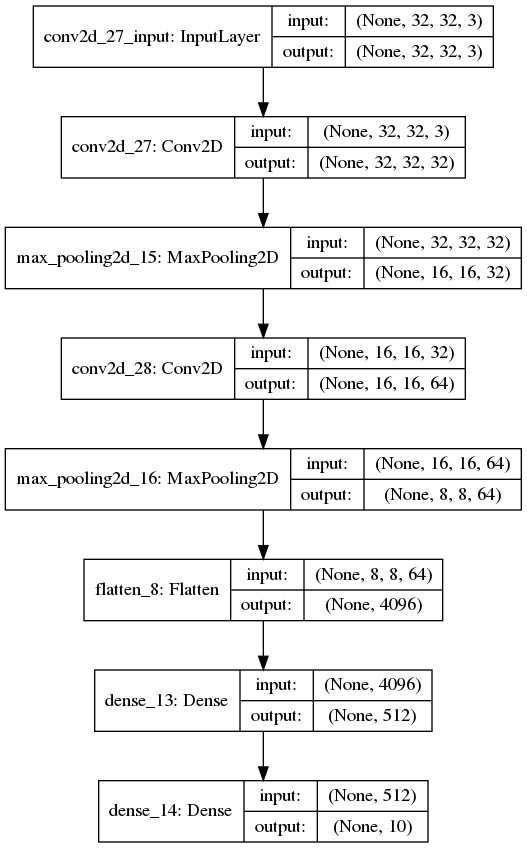

In [38]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

#### Compilamos el modelo y definimos el optimizador y la función de coste

In [39]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Entrenamos el modelo

In [40]:
train_log = model.fit(x_train, y_train, 
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 69us/step - loss: 5.4258 - acc: 0.3047 - val_loss: 1.7827 - val_acc: 0.4128
Epoch 2/100
40000/40000 [==============================] - 2s 56us/step - loss: 1.4414 - acc: 0.5032 - val_loss: 1.4067 - val_acc: 0.5173
Epoch 3/100
40000/40000 [==============================] - 3s 64us/step - loss: 1.1257 - acc: 0.6126 - val_loss: 1.3625 - val_acc: 0.5309
Epoch 4/100
40000/40000 [==============================] - 3s 64us/step - loss: 0.9118 - acc: 0.6833 - val_loss: 1.3200 - val_acc: 0.5690
Epoch 5/100
40000/40000 [==============================] - 3s 63us/step - loss: 0.7416 - acc: 0.7460 - val_loss: 1.2393 - val_acc: 0.5977
Epoch 6/100
40000/40000 [==============================] - 2s 61us/step - loss: 0.5986 - acc: 0.7979 - val_loss: 1.2604 - val_acc: 0.6016
Epoch 7/100
40000/40000 [==============================] - 3s 63us/step - loss: 0.4775 - acc: 0.8446 - val_loss: 1.3290 - 

40000/40000 [==============================] - 3s 65us/step - loss: 0.0045 - acc: 0.9988 - val_loss: 3.3063 - val_acc: 0.6463
Epoch 60/100
40000/40000 [==============================] - 3s 63us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 3.4070 - val_acc: 0.6386
Epoch 61/100
40000/40000 [==============================] - 2s 57us/step - loss: 0.0053 - acc: 0.9986 - val_loss: 3.2789 - val_acc: 0.6458
Epoch 62/100
40000/40000 [==============================] - 3s 69us/step - loss: 0.0040 - acc: 0.9989 - val_loss: 3.3676 - val_acc: 0.6552
Epoch 63/100
40000/40000 [==============================] - 2s 59us/step - loss: 0.0046 - acc: 0.9988 - val_loss: 3.9477 - val_acc: 0.6259
Epoch 64/100
40000/40000 [==============================] - 3s 64us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 3.4941 - val_acc: 0.6505
Epoch 65/100
40000/40000 [==============================] - 3s 65us/step - loss: 0.0041 - acc: 0.9985 - val_loss: 3.4284 - val_acc: 0.6498
Epoch 66/100
40000/40000 [==============

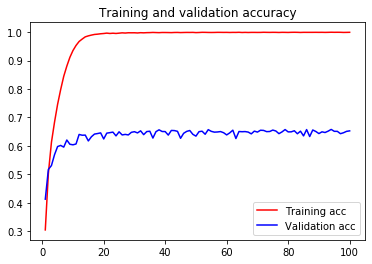

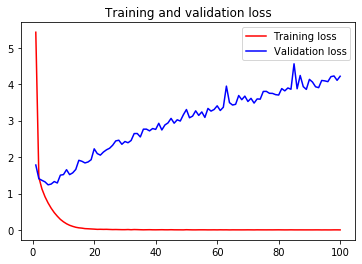

In [41]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 0s 44us/step
0.6504999995231628


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train, 
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 72us/step - loss: 8.2234 - acc: 0.1063 - val_loss: 2.3027 - val_acc: 0.0932
Epoch 2/100
40000/40000 [==============================] - 3s 70us/step - loss: 2.3112 - acc: 0.1013 - val_loss: 2.3026 - val_acc: 0.0932
Epoch 3/100
40000/40000 [==============================] - 3s 70us/step - loss: 2.3074 - acc: 0.1015 - val_loss: 2.3026 - val_acc: 0.0931
Epoch 4/100
40000/40000 [==============================] - 3s 70us/step - loss: 2.3010 - acc: 0.1019 - val_loss: 2.2386 - val_acc: 0.1472
Epoch 5/100
40000/40000 [==============================] - 3s 69us/step - loss: 2.2756 - acc: 0.1240 - val_loss: 2.2124 - val_acc: 0.1544
Epoch 6/100
40000/40000 [==============================] - 3s 70us/step - loss: 2.2216 - acc: 0.1466 - val_loss: 2.0623 - val_acc: 0.2327
Epoch 7/100
40000/40000 [==============================] - 3s 71us/step - loss: 2.1172 - acc: 0.1872 - val_loss: 1.9210 - 

40000/40000 [==============================] - 3s 70us/step - loss: 0.8490 - acc: 0.7102 - val_loss: 1.1193 - val_acc: 0.6689
Epoch 60/100
40000/40000 [==============================] - 3s 67us/step - loss: 0.8375 - acc: 0.7149 - val_loss: 1.0566 - val_acc: 0.6700
Epoch 61/100
40000/40000 [==============================] - 3s 63us/step - loss: 0.8414 - acc: 0.7147 - val_loss: 1.0697 - val_acc: 0.7001
Epoch 62/100
40000/40000 [==============================] - 3s 68us/step - loss: 0.8373 - acc: 0.7175 - val_loss: 1.0046 - val_acc: 0.7034
Epoch 63/100
40000/40000 [==============================] - 3s 68us/step - loss: 0.8413 - acc: 0.7178 - val_loss: 1.0697 - val_acc: 0.6962
Epoch 64/100
40000/40000 [==============================] - 3s 70us/step - loss: 0.8285 - acc: 0.7190 - val_loss: 1.0656 - val_acc: 0.6911
Epoch 65/100
40000/40000 [==============================] - 3s 71us/step - loss: 0.8297 - acc: 0.7177 - val_loss: 1.0273 - val_acc: 0.6963
Epoch 66/100
40000/40000 [==============

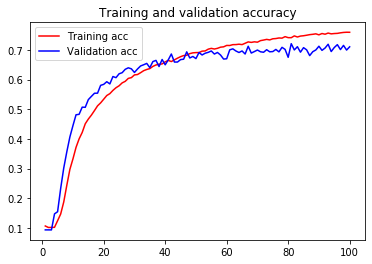

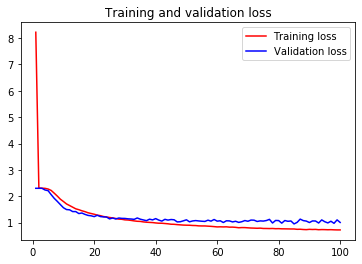

In [44]:
acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.clf()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 0s 44us/step
0.7156999707221985


In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_datagen.fit(x_train)

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=128),
                    epochs=100,
                    validation_data=(x_test, y_test))


Epoch 1/100
313/313 [==============================] - 12s 39ms/step - loss: 2.1223 - acc: 0.2172 - val_loss: 69.8191 - val_acc: 0.1173
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 1.9055 - acc: 0.3035 - val_loss: 149.9137 - val_acc: 0.1326
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 1.8410 - acc: 0.3314 - val_loss: 276.8601 - val_acc: 0.1239
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 1.7906 - acc: 0.3525 - val_loss: 342.9311 - val_acc: 0.1292
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 1.7498 - acc: 0.3690 - val_loss: 395.9366 - val_acc: 0.1280
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 1.7218 - acc: 0.3759 - val_loss: 441.7910 - val_acc: 0.1281
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 1.6955 - acc: 0.3869 - val_loss: 514.0365 - val_acc: 0.1225
Epoch 8/100
313/313 [=====================

313/313 [==============================] - 12s 38ms/step - loss: 1.3402 - acc: 0.5218 - val_loss: 618.6250 - val_acc: 0.1459
Epoch 61/100
313/313 [==============================] - 12s 38ms/step - loss: 1.3355 - acc: 0.5249 - val_loss: 551.8649 - val_acc: 0.1575
Epoch 62/100
313/313 [==============================] - 12s 38ms/step - loss: 1.3314 - acc: 0.5247 - val_loss: 501.8442 - val_acc: 0.1561
Epoch 63/100
313/313 [==============================] - 12s 38ms/step - loss: 1.3360 - acc: 0.5229 - val_loss: 536.0374 - val_acc: 0.1675
Epoch 64/100
313/313 [==============================] - 12s 39ms/step - loss: 1.3276 - acc: 0.5239 - val_loss: 580.0839 - val_acc: 0.1590
Epoch 65/100
313/313 [==============================] - 12s 38ms/step - loss: 1.3303 - acc: 0.5261 - val_loss: 586.9047 - val_acc: 0.1737
Epoch 66/100
313/313 [==============================] - 12s 39ms/step - loss: 1.3284 - acc: 0.5278 - val_loss: 521.4860 - val_acc: 0.1623
Epoch 67/100
313/313 [=========================

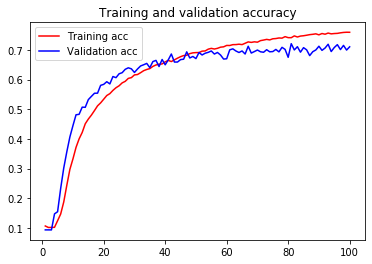

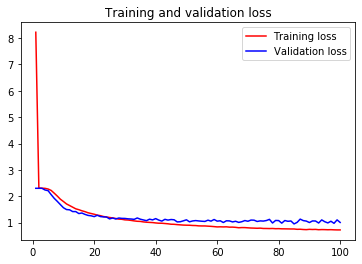

In [47]:
acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.clf()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 1s 79us/step
0.1923999935388565


In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3)), activation='relu')
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')
model.add(layers.Conv2D(64, (3, 3), activation='relu')
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512), activation='relu')
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10), activation='softmax')

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train, 
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 95us/step - loss: 3.0370 - acc: 0.2106 - val_loss: 1.8039 - val_acc: 0.3565
Epoch 2/100
40000/40000 [==============================] - 4s 92us/step - loss: 1.8006 - acc: 0.3406 - val_loss: 1.6074 - val_acc: 0.4299
Epoch 3/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.6302 - acc: 0.4026 - val_loss: 1.5215 - val_acc: 0.4453
Epoch 4/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.5067 - acc: 0.4532 - val_loss: 1.3718 - val_acc: 0.5146
Epoch 5/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.4133 - acc: 0.4905 - val_loss: 1.2865 - val_acc: 0.5416
Epoch 6/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.3420 - acc: 0.5163 - val_loss: 1.2359 - val_acc: 0.5613
Epoch 7/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.2657 - acc: 0.5451 - val_loss: 1.2334 -

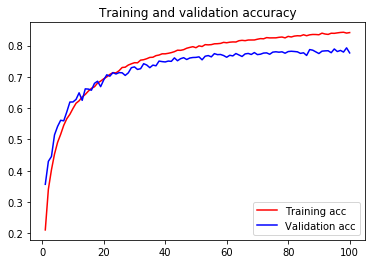

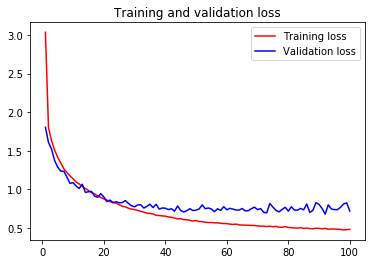

In [45]:
acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.clf()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 1s 84us/step
0.7766000032424927


In [47]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_datagen.fit(x_train)

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=128),
                    epochs=100,
                    validation_data=(x_test, y_test))

Epoch 1/100
313/313 [==============================] - 12s 39ms/step - loss: 2.2257 - acc: 0.1911 - val_loss: 123.9025 - val_acc: 0.1033
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 1.8361 - acc: 0.3259 - val_loss: 410.3807 - val_acc: 0.1000
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 1.7240 - acc: 0.3683 - val_loss: 444.7358 - val_acc: 0.1003
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 1.6509 - acc: 0.3989 - val_loss: 415.2201 - val_acc: 0.1062
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 1.5974 - acc: 0.4218 - val_loss: 266.8120 - val_acc: 0.1167
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 1.5571 - acc: 0.4368 - val_loss: 278.4246 - val_acc: 0.1139
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 1.5177 - acc: 0.4552 - val_loss: 234.2589 - val_acc: 0.1366
Epoch 8/100
313/313 [====================

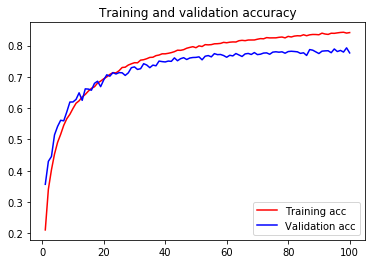

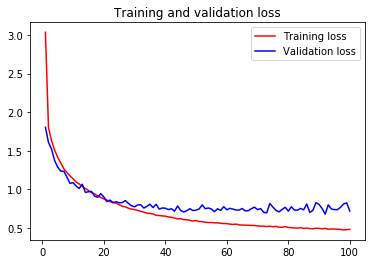

In [48]:
acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.clf()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 1s 83us/step
0.3041999936103821
